# Input/Output & attributes

This Jupyter notebook has been created to compare different features with several open source Python librairies for rasters management.

This notebook will particularly focus on opening/ saving a raster object (I/O), and accessing its main attributes.

The following librairies will be considered :
- rasterio
- rioxarray
- odc-geo
- geoutils

In [1]:
import rasterio
from rasterio.plot import show

import rioxarray

import odc.geo.xr

import geoutils as gu

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import dask

In [2]:
#path to the raster object
raster_path = "./data/PlanetObserver_PlanetSAT_10m_Ukraine_Odessa_UTM36.tif"

## Opening the raster object and checking its main attributes

### • rasterio

The dedicated raster object for rasterio is a *rasterio.dataset*.

It can be opened by using the *rasterio.open()* function.

In [3]:
ds_rasterio = rasterio.open(raster_path)

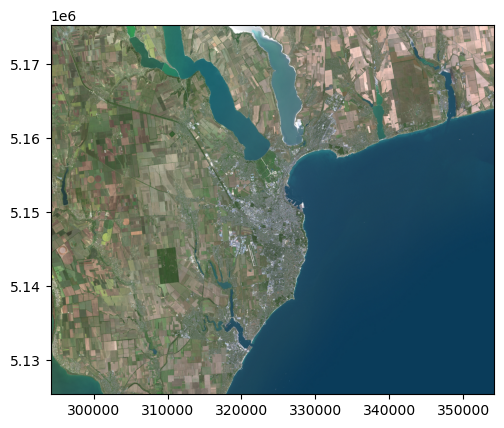

<Axes: >

In [4]:
show(ds_rasterio)

Main attributes can be accessed individually :

In [5]:
print(f"""
RASTERIO DATASET ATTRIBUTES\n
Path : {ds_rasterio.name}
Driver : {ds_rasterio.driver}
Number of band(s) : {ds_rasterio.count}
Data type : {ds_rasterio.dtypes}
Size : {ds_rasterio.height} rows x {ds_rasterio.width} columns
CRS : {ds_rasterio.crs}
Bounds : {ds_rasterio.bounds}
Transform : {ds_rasterio.transform}
Nodata : {ds_rasterio.nodata}
""")


RASTERIO DATASET ATTRIBUTES

Path : ./data/PlanetObserver_PlanetSAT_10m_Ukraine_Odessa_UTM36.tif
Driver : GTiff
Number of band(s) : 3
Data type : ('uint8', 'uint8', 'uint8')
Size : 5003 rows x 6003 columns
CRS : EPSG:32636
Bounds : BoundingBox(left=294178.940679632, bottom=5125357.67146296, right=354208.940679632, top=5175387.67146296)
Transform : | 10.00, 0.00, 294178.94|
| 0.00,-10.00, 5175387.67|
| 0.00, 0.00, 1.00|
Nodata : None



They can also be accessed with *.meta.items()*.

In [6]:
print("RASTERIO DATASET ATTRIBUTES\n")
for key, value in ds_rasterio.meta.items():
    print(f"{key} : {value}")

RASTERIO DATASET ATTRIBUTES

driver : GTiff
dtype : uint8
nodata : None
width : 6003
height : 5003
count : 3
crs : EPSG:32636
transform : | 10.00, 0.00, 294178.94|
| 0.00,-10.00, 5175387.67|
| 0.00, 0.00, 1.00|


### • rioxarray

The dedicated raster object for rioxarray is a *xarray.DataArray* enriched with an accessor *.rio*.

We can use the *open_rasterio()* function to open it.

In [7]:
ds_rioxarray = rioxarray.open_rasterio(raster_path)

In [8]:
ds_rioxarray

<xarray.DataArray (band: 3, y: 5003, x: 6003)> Size: 90MB
[90099027 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 48kB 2.942e+05 2.942e+05 ... 3.542e+05 3.542e+05
  * y            (y) float64 40kB 5.175e+06 5.175e+06 ... 5.125e+06 5.125e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Raster can also be opened using dask with rioxarray. It is useful to manipulate large raster files without entirely loading them into memory.

For that, we need to specify the chunks sizes along each dimension we want, using the *chunks* argument. In our example we will keep it to "True" to select sizes automatically.

In [9]:
import dask.array as da

da_rioxarray = rioxarray.open_rasterio(raster_path, chunks=True)

In [10]:
da_rioxarray

<xarray.DataArray (band: 3, y: 5003, x: 6003)> Size: 90MB
dask.array<open_rasterio-5141f58060e817b24443215526244b08<this-array>, shape=(3, 5003, 6003), dtype=uint8, chunksize=(1, 5003, 6003), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 48kB 2.942e+05 2.942e+05 ... 3.542e+05 3.542e+05
  * y            (y) float64 40kB 5.175e+06 5.175e+06 ... 5.125e+06 5.125e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Main attributes can be accessed individually :

In [11]:
print(f"""
RIOXARRAY DATASET ATTRIBUTES\n
Number of band(s) : {ds_rioxarray.rio.count}
Data type : {ds_rioxarray.dtype}
Size : {ds_rioxarray.rio.height} rows x {ds_rioxarray.rio.width} columns
CRS : {ds_rioxarray.rio.crs}
Resolution : {ds_rioxarray.rio.resolution()}
Bounds : {ds_rioxarray.rio.bounds()}
Transform : {ds_rioxarray.rio.transform()}
Nodata : {ds_rioxarray.rio.nodata}
""")


RIOXARRAY DATASET ATTRIBUTES

Number of band(s) : 3
Data type : uint8
Size : 5003 rows x 6003 columns
CRS : EPSG:32636
Resolution : (10.0, -10.0)
Bounds : (294178.940679632, 5125357.67146296, 354208.940679632, 5175387.67146296)
Transform : | 10.00, 0.00, 294178.94|
| 0.00,-10.00, 5175387.67|
| 0.00, 0.00, 1.00|
Nodata : None



As in rasterio, we can see the main attributes by using *.meta.items()*.

In [12]:
print("RIOXARRAY DATASET ATTRIBUTES\n")
with ds_rioxarray.rio._manager.acquire() as ds:
    for key, value in ds.meta.items():
        print(f"{key} : {value}")

RIOXARRAY DATASET ATTRIBUTES

driver : GTiff
dtype : uint8
nodata : None
width : 6003
height : 5003
count : 3
crs : EPSG:32636
transform : | 10.00, 0.00, 294178.94|
| 0.00,-10.00, 5175387.67|
| 0.00, 0.00, 1.00|


### • odc-geo

To open a raster, we can use the rioxarray *open_rasterio()* function :

In [13]:
ds_odcgeo = rioxarray.open_rasterio(raster_path)

Some attributes can be accessed as follows :

In [14]:
print(f"""ODC-GEO DATASET ATTRIBUTES\n
CRS : {ds_odcgeo.odc.crs}
Transform : {ds_odcgeo.odc.transform}
Geobox : {ds_odcgeo.odc.geobox}
Nodata : {ds_odcgeo.odc.nodata}
""")

ODC-GEO DATASET ATTRIBUTES

CRS : PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722356049,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32636"]]
Transform : | 10.00, 0.00, 294178.94|
| 0.00,-10.00, 5175387.67|
| 0.00, 0.00, 1.00|
Geobox : GeoBox((5003, 6003), Affine(10.0, 0.0, 294178.940679632,
       0.0, -10.0, 5175387.67146296), CRS('PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.25722356049,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0

### • geoutils

The dedicated raster object for geoutils is a *geoutils.raster*.

In [15]:
ds_geoutils = gu.Raster(raster_path)

A detailed overview of the main attributes is obtained using the *info()* function :

In [16]:
print("GEOUTILS DATASET ATTRIBUTES\n")
print(ds_geoutils.info())

GEOUTILS DATASET ATTRIBUTES

Driver:               GTiff 
Opened from file:     ./data/PlanetObserver_PlanetSAT_10m_Ukraine_Odessa_UTM36.tif 
Filename:             ./data/PlanetObserver_PlanetSAT_10m_Ukraine_Odessa_UTM36.tif 
Loaded?               False 
Modified since load?  False 
Grid size:            6003, 5003
Number of bands:      3
Data types:           uint8
Coordinate system:    ['EPSG:32636']
Nodata value:         None
Pixel interpretation: Area
Pixel size:           10.0, 10.0
Upper left corner:    294178.940679632, 5175387.67146296
Lower right corner:   354208.940679632, 5125357.67146296

None


## Access to GCPs (Ground Control Points)

Access to GCPs are implemented in rasterio, rioxarray and geoutils, but not in odc-geo.

### • rasterio

GCPs in rasterio can be accessed with the attribute *.gcps*.

It will return a tuple in the following format : (gcp_list, gcp_crs).

In [17]:
ds_rasterio.gcps

([], None)

Each GCP is an object rasterio.control.GroundControlPoint containing :
- *row, col*
- *x, y, z*
- *id, info*

### • rioxarray

==TO BE COMPLETED==

### • geoutils

==TO BE COMPLETED==

## Access to RPCs (Rational Polynomial Coefficients)

Access to RPCs are only implemented in rasterio.

### • rasterio

They can be checked using *.rpcs*.

In [18]:
ds_rasterio.rpcs

It will return an instance of rasterio.rpc.RPC if there are RPCs, otherwise it will be empty.

## Reading by Windows and Blocks

A Window or a Block is a subset of a raster.

It is particularly useful when working with big files to reduce memory usage and speed up processing times.

### • rasterio

In rasterio, we can use the object *Window* to create one.

In the following case, we will create a subset of 500 rows x 500 columns.

In [39]:
from rasterio.windows import Window

window = Window(col_off=1500, row_off=1500, width=500, height=500)

We will focus on the first band for our example.

In [40]:
full = ds_rasterio.read(1)

w = ds_rasterio.read(1, window=window)

Let's compare the full raster with the subset image :

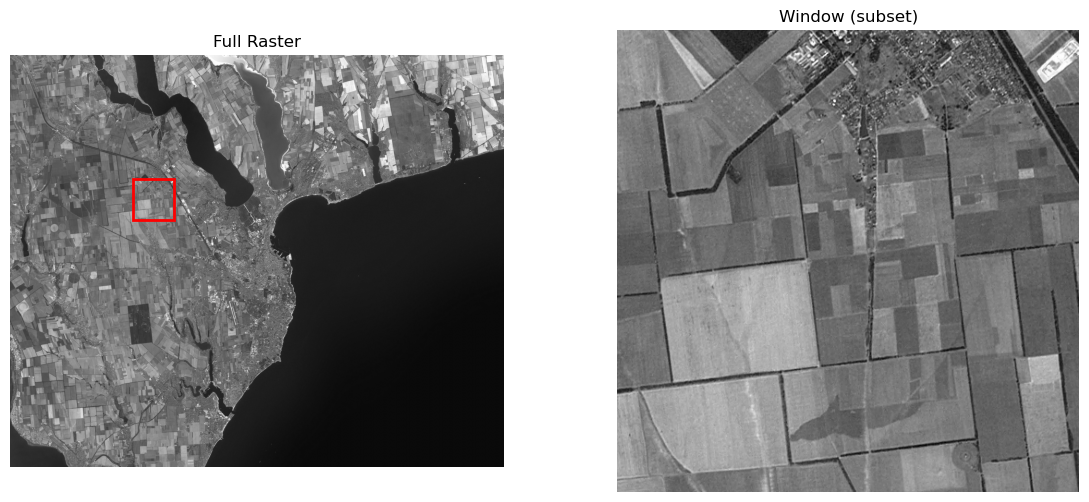

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#full raster
axes[0].imshow(full, cmap='gray')
axes[0].set_title("Full Raster")
axes[0].axis("off")

#rectangle
rect = patches.Rectangle(
    (window.col_off, window.row_off),
    window.width,
    window.height,
    linewidth=2, edgecolor='red', facecolor='none'
)
axes[0].add_patch(rect)

#window raster
axes[1].imshow(w, cmap='gray')
axes[1].set_title("Window (subset)")
axes[1].axis("off")

plt.show()

For the blocks, their shape can be obtained using the *block_shapes* property :

In [22]:
for i, shape in enumerate(ds_rasterio.block_shapes, 1):
    print((i, shape))

(1, (1, 6003))
(2, (1, 6003))
(3, (1, 6003))


Block windows can also be obtained with the *block_windows()* function :

In [23]:
for ji, window in ds_rasterio.block_windows(1):
    print((ji, window))

((0, 0), Window(col_off=0, row_off=0, width=6003, height=1))
((1, 0), Window(col_off=0, row_off=1, width=6003, height=1))
((2, 0), Window(col_off=0, row_off=2, width=6003, height=1))
((3, 0), Window(col_off=0, row_off=3, width=6003, height=1))
((4, 0), Window(col_off=0, row_off=4, width=6003, height=1))
((5, 0), Window(col_off=0, row_off=5, width=6003, height=1))
((6, 0), Window(col_off=0, row_off=6, width=6003, height=1))
((7, 0), Window(col_off=0, row_off=7, width=6003, height=1))
((8, 0), Window(col_off=0, row_off=8, width=6003, height=1))
((9, 0), Window(col_off=0, row_off=9, width=6003, height=1))
((10, 0), Window(col_off=0, row_off=10, width=6003, height=1))
((11, 0), Window(col_off=0, row_off=11, width=6003, height=1))
((12, 0), Window(col_off=0, row_off=12, width=6003, height=1))
((13, 0), Window(col_off=0, row_off=13, width=6003, height=1))
((14, 0), Window(col_off=0, row_off=14, width=6003, height=1))
((15, 0), Window(col_off=0, row_off=15, width=6003, height=1))
((16, 0), Wi

### • geoutils

==TO BE COMPLETED==

## Decimation

Decimation is used to reduce the image resolution of a raster by skipping a certain amount of pixels in rows, columns or both.

It is particularly useful to speed up the display or analyze large raster files.

### • rasterio

In the following case, we will reduce the size by half (height and width).

In [24]:
with rasterio.open(raster_path) as src:
    b, g, r = (src.read(k) for k in (1, 2, 3))
# src.height = 5003, src.width = 6003

write_window = Window.from_slices(slice(None), slice(None), height=2501, width=3001)
# write_window.height = 172, write_window.width = 172

with rasterio.open('./outputs/rasterio_decimation.tif', 'w', width=3500, height=3500, count=3, dtype=r.dtype) as dst:
    for k, arr in [(1, b), (2, g), (3, r)]:
        dst.write(arr, indexes=k, window=write_window)

c:\Users\cbernaert\AppData\Local\anaconda3\envs\open_source_rasters_comparison\Lib\site-packages\rasterio\__init__.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [25]:
decimated_raster = rasterio.open("./outputs/rasterio_decimation.tif")

decimated_raster_b1 = decimated_raster.read(1)

c:\Users\cbernaert\AppData\Local\anaconda3\envs\open_source_rasters_comparison\Lib\site-packages\rasterio\__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Let's compare the original image with the decimated one :

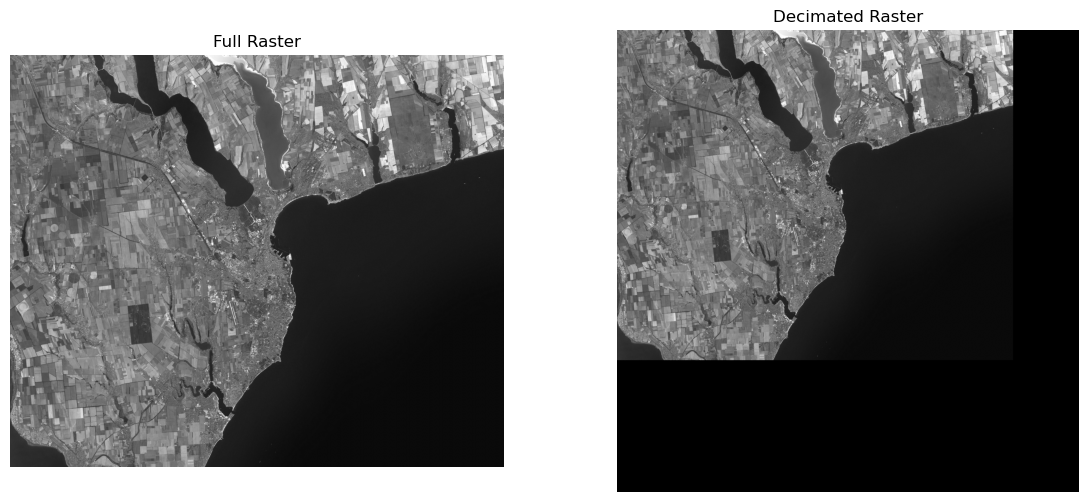

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#full raster
axes[0].imshow(full, cmap='gray')
axes[0].set_title("Full Raster")
axes[0].axis("off")

#window raster
axes[1].imshow(decimated_raster_b1, cmap='gray')
axes[1].set_title("Decimated Raster")
axes[1].axis("off")

plt.show()

### • geoutils

==TO BE COMPLETED==

## Save to local disk

In this section, we will demonstrate how to save our raster locally.

As an example, we will save our "window" raster created in the previous section.

### • rasterio

First, we need to update metadatas.

In [27]:
transform = ds_rasterio.window_transform(window)

profile = ds_rasterio.profile.copy()
profile.update({
    "height": w.shape[0],
    "width": w.shape[1],
    "transform": transform
})

We can then save the output file with the *.write()* function :

In [28]:
with rasterio.open("./outputs/rasterio_window_raster.tif", "w", **profile) as dst:
    dst.write(w, 1)

### • rioxarray

With rioxarray, we can save our raster locally with the function *to_raster()* :

In [29]:
with rioxarray.open_rasterio(raster_path) as src:
    src.rio.to_raster("./outputs/rioxarray_raster_output.tif")

### • odc-geo

==TO BE COMPLETED==

### • geoutils

Using geoutils, we can save our raster locally by using the *save()* function :

In [30]:
ds_geoutils.save("./outputs/geoutils_raster.tif")

## Save to COG (Cloud-Optimized GeoTIFF) format

A Cloud-Optimized GeoTIFF (COG) is a regular GeoTIFF file structured to be read efficiently from the cloud, without the need to download the entire file.

It is a storage format optimized for remote access, particularly via HTTP/HTTPS.

### • rasterio

Since recent versions of GDAL (> 3.1), rasterio can use the driver COG when saving a file.

In [31]:
from rasterio.shutil import copy as rio_copy

input_raster_path = "./data/PlanetObserver_PlanetSAT_10m_Ukraine_Odessa_UTM36.tif"
output_rasterio_cog = "./outputs/rasterio_cog.tif"

# COG options
cog_profile = dict(
    driver="COG",
    compress="LZW",
    blocksize=512,
    overview_resampling="average"
)

rio_copy(
    input_raster_path,
    output_rasterio_cog,
    **cog_profile
)

We can verify the validity of our COG file newly created using the *cog_validate()* function from the rio-cogeo library.

In [32]:
from rio_cogeo.cogeo import cog_validate

cog_validate(output_rasterio_cog, strict=True)

(True, [], [])

### • rioxarray

It is possible to save COG files using rioxarray with the function *to_raster()* since it integrates the driver COG as for rasterio :

In [33]:
output_rioxarray_cog = "./outputs/rioxarray_cog.tif"

with rioxarray.open_rasterio(raster_path) as src:
    src.rio.to_raster(
        output_rioxarray_cog,
        driver="COG",
        compress="LZW",
        blocksize=512,
        BIGTIFF="IF_SAFER",
        overview_resampling="average"
    )

Once again, we can verify the validity of the COG file with rio-cogeo :

In [34]:
cog_validate(output_rioxarray_cog, strict=True)

(True, [], [])

### • odc-geo

odc-geo includes several options to save COG files, with or without dask.

- Without dask, using the *write_cog()* function :

In [35]:
from odc.geo.xr import write_cog

In [36]:
da_odcgeo = rioxarray.open_rasterio("./data/PlanetObserver_PlanetSAT_10m_Ukraine_Odessa_UTM36.tif")

output_odcgeo_cog = "./outputs/odcgeo_cog.tif"

write_cog(da_odcgeo, output_odcgeo_cog)

WindowsPath('outputs/odcgeo_cog.tif')

We can check the validity using :

In [37]:
cog_validate(output_odcgeo_cog, strict=True)

(True, [], [])

- With dask, using the "save_cog_with_dask()" function :

In [38]:
from odc.geo.cog import save_cog_with_dask

==TO BE COMPLETED==

### • geoutils

==TO BE COMPLETED==

## Save to Zarr format

### • rasterio

==TO BE COMPLETED==

### • rioxarray

==TO BE COMPLETED==

### • odc-geo

==TO BE COMPLETED==

### • geoutils

==TO BE COMPLETED==